### 지도 비지도 학습 모델 

#### 지도 KNN

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_dataset = load_iris()
target = iris_dataset['target']    # label

# train/test 데이터 분리
train_input, test_input, train_label, test_label = train_test_split(iris_dataset['data'],
                                                                    target,
                                                                    test_size = 0.3,   # test data의 비율
                                                                    random_state=0)    # random seed 값

# 지도학습 모델 중 k-nn모델
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(train_input, train_label)    # 분류기 모델에 학습 데이터와 label 데이터 적용
predict_label = knn.predict(test_input)    # 분류기 모델의 결과 예측

import numpy as np
print('test accuracy {:.2f}'.format(np.mean(test_label == predict_label)))   # 정확도 출력 1

test accuracy 0.98


#### 비지도 K-Means

In [17]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# 데이터 불러오기
iris = datasets.load_iris()

# 종속변수 지정
X = iris.data[:, :2]
y = iris.target



Text(0, 0.5, 'Sepal Width')

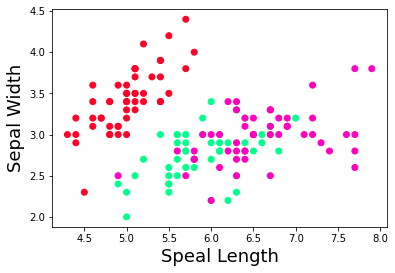

In [13]:
# Sepal length”와 “Sepal width” 컬럼 두개만 추출하여 
# 스캐터 플롯으로 확인

plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Speal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)


In [18]:
# 비지도학습 모델
KMeans = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)

# 모델 학습
KMeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [19]:
# 중심점 출력
centers = KMeans.cluster_centers_
print(centers)


[[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]


Text(0.5, 1.0, 'Predicted')

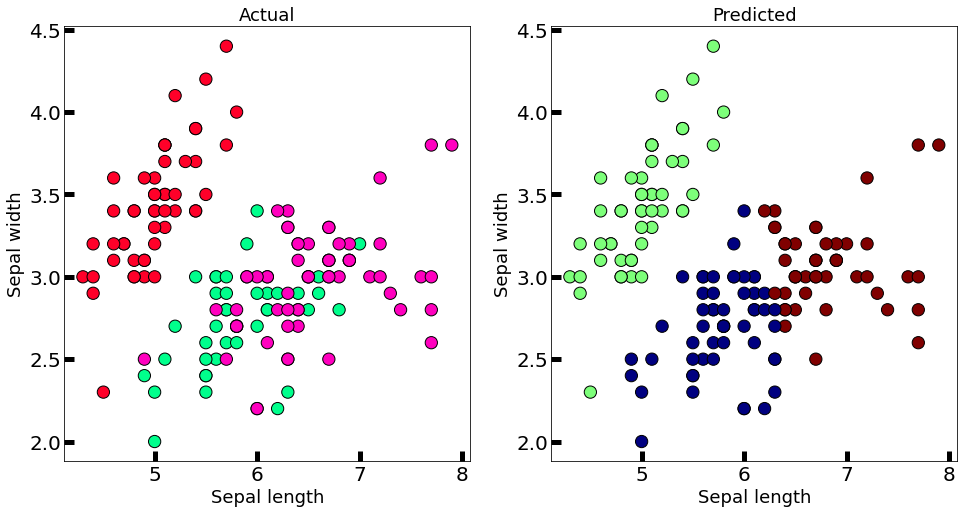

In [20]:
# 원본 데이터와 클러스링 결과 비교 
# 해당 데이터가 어느 클러스터에 속하는지 확인 합니다.

new_labels = KMeans.labels_

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)
